In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras.models import load_model

In [2]:
# load test set
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype('uint8')  # keep as uint8 for OpenCV ops

# load saved model
model_path = "models/mnist_cnn.h5"
model = load_model(model_path)
print("Model loaded from:", model_path)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# choose index to inspect 
idx = 6
print("Using test sample index:", idx)


Model loaded from: models/mnist_cnn.h5
x_test shape: (10000, 28, 28) y_test shape: (10000,)
Using test sample index: 6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


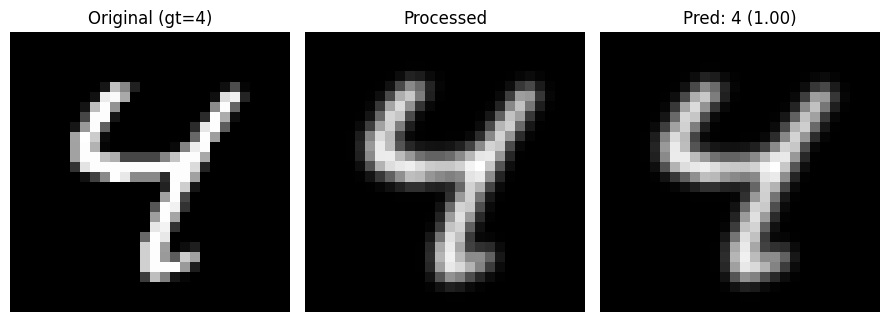

Ground truth: 4  →  Predicted: 4  (confidence 0.9988)


In [3]:
# Preprocess with OpenCV, run inference, and display results

# pick sample (change idx above to test other examples)
orig = x_test[idx]                  # uint8 28x28

# example preprocessing: upscale -> Gaussian blur -> resize back
up = cv2.resize(orig, (64, 64), interpolation=cv2.INTER_LINEAR)
blur = cv2.GaussianBlur(up, (5,5), 0)
proc = cv2.resize(blur, (28, 28), interpolation=cv2.INTER_AREA)

# prepare for model: normalize and add channel/batch dims
proc_norm = proc.astype('float32') / 255.0
proc_input = np.expand_dims(proc_norm, axis=(0, -1))  # shape (1,28,28,1)

# predict
pred_probs = model.predict(proc_input)
pred_label = int(np.argmax(pred_probs))
pred_conf = float(np.max(pred_probs))

# display
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
plt.title(f"Original (gt={y_test[idx]})")
plt.imshow(orig, cmap='gray'); plt.axis('off')

plt.subplot(1,3,2)
plt.title("Processed")
plt.imshow(proc, cmap='gray'); plt.axis('off')

plt.subplot(1,3,3)
plt.title(f"Pred: {pred_label} ({pred_conf:.2f})")
plt.imshow(proc, cmap='gray'); plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Ground truth: {y_test[idx]}  →  Predicted: {pred_label}  (confidence {pred_conf:.4f})")


In [4]:
# Save the already-loaded model in native Keras format (.keras)
model.save("models/mnist_cnn.keras", save_format="keras")
print("Saved native Keras model -> models/mnist_cnn.keras")

Saved native Keras model -> models/mnist_cnn.keras
